<a href="https://colab.research.google.com/github/kelgruber/hand-gesture-classification/blob/main/Kel_Gruber_Final_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Task 4: Effects of Regularization

Kel Gruber

## Dataset - Hand Gesture Classification

Goal of this project is build a model that correctly classifies images of 5 different hand gestures. Dataset consists of over 2650 digital colored images that belong to 5 classes: dislike, like, peace, one, and stop. 2500 images came from the crowdsourced HaGRID dataset and 150 images were taken by Kel Gruber and classmate volunteers following the Hagrid dataset's collection guidelines.

The 2500 images originally came from this [HaGRID Sample 30k 384p Dataset](https://www.kaggle.com/datasets/innominate817/hagrid-sample-30k-384p) on Kaggle, this sample contains 30,000 images and all 18 classes.

##1. Load Dataset and Preview Images
For reproducibility the dataset has been split before we begin into 3 sets, the training, validation and testing sets. The training set contains approximately 60% of the data, and the validation and testing sets each contain 20% of the data. For training we will be using the data augmentation settings from Task 3 which produced the best results on the validation set. We will then test the models using the unaugmented validation and testing sets.

This task will be completed with the revised dataset from Task 1 with the cropped images. As shown in the Task 1 experiments the original data requires very deep models to learn due to the complexity of the complexity of the original images.

### Import libaries and connect to Drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/5390 Final Project/Cropped_Split_Data.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training, Validation, and Testing Datasets

In [ ]:
image_size = 100

image_generator = ImageDataGenerator(rescale=1./255)
augmented_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.35, rotation_range=25, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

training_data = augmented_generator.flow_from_directory( '/tmp/Cropped_Split_Data/training', target_size=(image_size , image_size), batch_size=1, class_mode='categorical')
print(training_data.image_shape)

aug_valid_set = augmented_generator.flow_from_directory( '/tmp/Cropped_Split_Data/validation', target_size=(image_size , image_size ), batch_size=1, class_mode='categorical')
print(aug_valid_set.image_shape)

#For testing the model
validation_set = image_generator.flow_from_directory( '/tmp/Cropped_Split_Data/validation', target_size=(image_size , image_size ), batch_size=1, class_mode='categorical')
print(validation_set.image_shape)

testing_set = image_generator.flow_from_directory( '/tmp/Cropped_Split_Data/testing', target_size=(image_size , image_size), batch_size=1, class_mode='categorical')
print(testing_set.image_shape)

Found 1590 images belonging to 5 classes.
(100, 100, 3)
Found 530 images belonging to 5 classes.
(100, 100, 3)
Found 530 images belonging to 5 classes.
(100, 100, 3)
Found 530 images belonging to 5 classes.
(100, 100, 3)


###View Some Examples from the Training Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
i = 3
label_category = {0: "Dislike", 1: "Like", 2: "One", 3: "Peace", 4: "Stop"}

images = []
labels = []
for i in range(9):
    image, label = next(training_data)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(14,10))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

##2. Applying Different Regularization Techniques

Our goal in this phase is to improve the best model from Phase 2, Model 7 which had a 77.17% accuracy on the validation set and 75.85% testing set by applying various data augmentations. In Task 3 by using image generators to apply horizontal and vertical shifts, flips, rotations, and zoom we were able to train a model that had 86.04% on the unaugmented validation set.

In this task we will try to further improve the model's accuracy on the validation set by using different regularization techniques like batch normalization, dropout, and L2 regularization. We will use the same data augmentation settings for training from Task 3 which produced the best results on the validation set. We will then test the models using the unaugmented validation and testing sets.

Model Structure:
- 3 Convolutional layers with 200, 100, 50 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (5,5) and (3,3) pooling windows
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 5 neurons using a softmax activation function


###2.1 Experiment 1: Applying Batch Normalization

Model Structure:
- 3 Convolutional layers with 200, 100, 50 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (5,5) and (3,3) pooling windows
- 2 Batch Normalization Layers after the 1st and 2nd MaxPool layers
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 5 neurons using a softmax activation function

####Build Model

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
model_1 = Sequential()

model_1.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape=training_data.image_shape))
model_1.add(layers.MaxPooling2D((5,5)))
model_1.add( BatchNormalization())
model_1.add(layers.Conv2D(100, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((3, 3)))
model_1.add( BatchNormalization())
model_1.add(layers.Conv2D(50, (3, 3), activation='relu'))
model_1.add( Flatten() )
model_1.add( Dense(5, activation = 'softmax' ) )

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 200)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 19, 19, 200)       800       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 100)       180100    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 100)         0         
 g2D)                                                            
                                                      

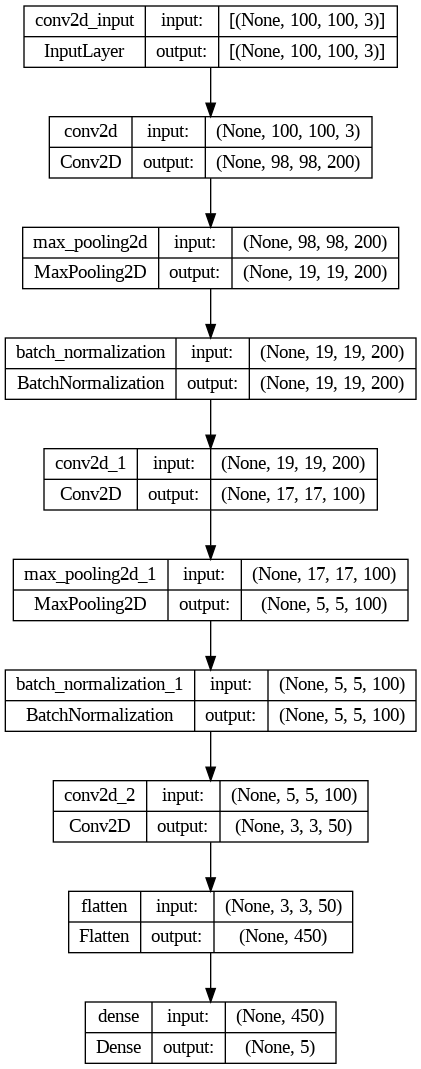

In [ ]:
tf.keras.utils.plot_model(model_1, show_layer_names=True, show_shapes=True)

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_1_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 40, verbose=1)
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history1 = model_1.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
1586/1590 [============================>.] - ETA: 0s - loss: 1.7194 - accuracy: 0.4111
Epoch 1: val_loss improved from inf to 1.44219, saving model to model_1_best.hdf5
1590/1590 [==============================] - 22s 12ms/step - loss: 1.7192 - accuracy: 0.4113 - val_loss: 1.4422 - val_accuracy: 0.4717
Epoch 2/100
1584/1590 [============================>.] - ETA: 0s - loss: 1.1830 - accuracy: 0.5436
Epoch 2: val_loss improved from 1.44219 to 1.38166, saving model to model_1_best.hdf5
1590/1590 [==============================] - 24s 15ms/step - loss: 1.1810 - accuracy: 0.5447 - val_loss: 1.3817 - val_accuracy: 0.5038
Epoch 3/100
1590/1590 [==============================] - ETA: 0s - loss: 1.0520 - accuracy: 0.5748
Epoch 3: val_loss improved from 1.38166 to 1.33886, saving model to model_1_best.hdf5
1590/1590 [==============================] - 27s 17ms/step - loss: 1.0520 - accuracy: 0.5748 - val_loss: 1.3389 - val_accuracy: 0.5434
Epoch 4/100
1587/1590 [=====================

####View Learning Curves

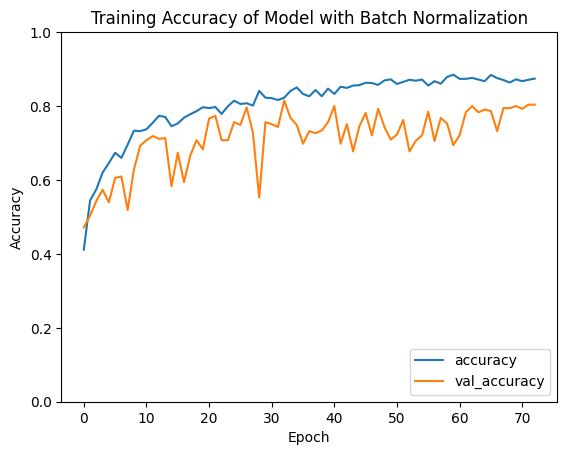

In [ ]:
plt.title('Training Accuracy of Model with Batch Normalization')
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

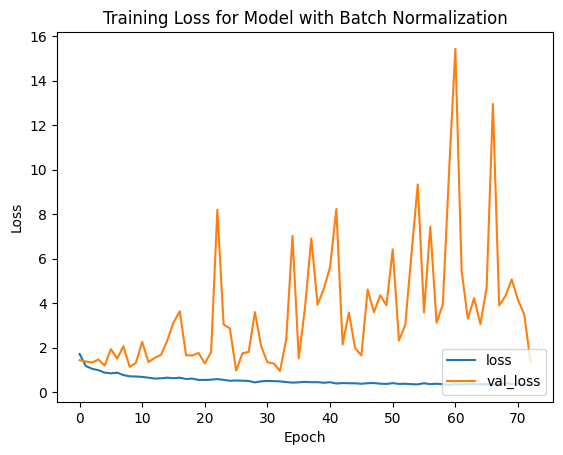

In [ ]:
plt.title('Training Loss for Model with Batch Normalization')
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_1.load_weights('model_1_best.hdf5')

####Evaluate Model on Validation Set

In [ ]:
val_loss, val_acc = model_1.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 3s 6ms/step - loss: 0.9559 - accuracy: 0.8151
Accuracy: 81.50943517684937
Loss:0.955926775932312


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_1.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8150943396226416
Precision: 0.8196658012393012
Recall: 0.8150943396226416
F1 Score: 0.8136233826783033


####Evaluate On Testing Set

In [ ]:
val_loss, val_acc = model_1.evaluate(testing_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 3s 6ms/step - loss: 1.0425 - accuracy: 0.7698
Accuracy: 76.98113322257996
Loss:1.0424727201461792


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(testing_set)):
   x, y = testing_set.next()
   p = model_1.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.769811320754717
Precision: 0.7785333284276837
Recall: 0.769811320754717
F1 Score: 0.7701835063217742


###2.2 Experiment 2: Adding Dropout Layers

Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 2 Dropout Layers after the 1st and 2nd MaxPool layers
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


####Build Model

In [ ]:
model_2 = Sequential()

model_2.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape = training_data.image_shape))
model_2.add(layers.MaxPooling2D((5,5)))
model_1.add( Dropout(rate=0.1))
model_2.add(layers.Conv2D(100, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((3, 3)))
model_1.add( Dropout(rate=0.05))
model_2.add(layers.Conv2D(50, (3, 3), activation='relu'))
model_1.add( Dropout(rate=0.05))
model_2.add( Flatten() )
model_2.add( Dense(5, activation = 'softmax' ) )

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 17, 100)       180100    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 100)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 50)          45050     
                                                                 
 flatten_3 (Flatten)         (None, 450)              

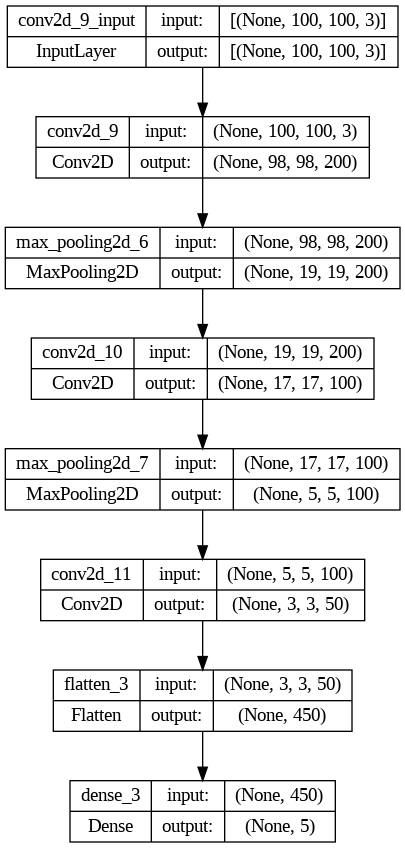

In [ ]:
tf.keras.utils.plot_model(model_2, show_layer_names=True, show_shapes=True)

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_2_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 40, verbose=1)
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history2 = model_2.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
1582/1590 [============================>.] - ETA: 0s - loss: 1.6148 - accuracy: 0.2200
Epoch 1: val_loss improved from inf to 1.56340, saving model to model_2_best.hdf5
1590/1590 [==============================] - 16s 9ms/step - loss: 1.6147 - accuracy: 0.2208 - val_loss: 1.5634 - val_accuracy: 0.3000
Epoch 2/100
1587/1590 [============================>.] - ETA: 0s - loss: 1.4594 - accuracy: 0.3655
Epoch 2: val_loss improved from 1.56340 to 1.27206, saving model to model_2_best.hdf5
1590/1590 [==============================] - 18s 11ms/step - loss: 1.4593 - accuracy: 0.3654 - val_loss: 1.2721 - val_accuracy: 0.4925
Epoch 3/100
1589/1590 [============================>.] - ETA: 0s - loss: 1.3786 - accuracy: 0.4078
Epoch 3: val_loss improved from 1.27206 to 1.18184, saving model to model_2_best.hdf5
1590/1590 [==============================] - 17s 11ms/step - loss: 1.3783 - accuracy: 0.4082 - val_loss: 1.1818 - val_accuracy: 0.5566
Epoch 4/100
1587/1590 [======================

####View Learning Curves

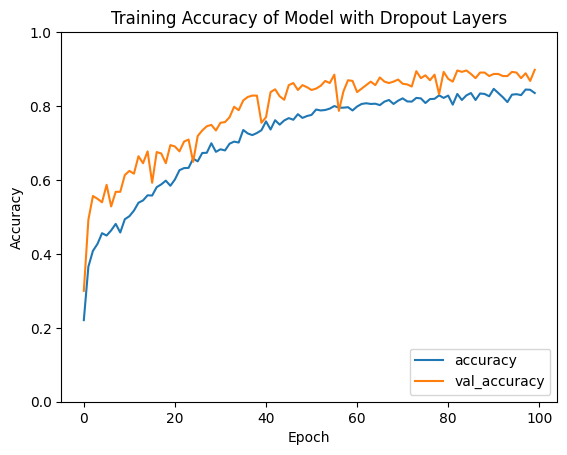

In [ ]:
plt.title('Training Accuracy of Model with Dropout Layers')
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

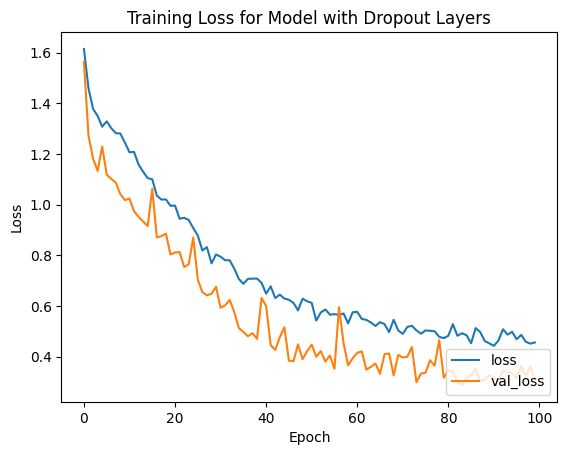

In [ ]:
plt.title('Training Loss for Model with Dropout Layers')
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

####Evaluate Model on Validation Set

In [ ]:
model_2.load_weights('model_2_best.hdf5')

In [ ]:
val_loss, val_acc = model_2.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 3s 5ms/step - loss: 0.2883 - accuracy: 0.8925
Accuracy: 89.24528360366821
Loss:0.2883192300796509


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8924528301886793
Precision: 0.8971800304530902
Recall: 0.8924528301886793
F1 Score: 0.8918477869922886


####Evaluate On Testing Set

In [ ]:
val_loss, val_acc = model_2.evaluate(testing_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 3s 6ms/step - loss: 0.3344 - accuracy: 0.8981
Accuracy: 89.81131911277771
Loss:0.3344452679157257


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(testing_set)):
   x, y = testing_set.next()
   p = model_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8981132075471698
Precision: 0.8985028603142204
Recall: 0.8981132075471698
F1 Score: 0.8977875402943014


###2.3 Experiment 3: Using L2 Regularization


Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function and L2 Regularization
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


####Build Model

In [ ]:
model_3 = Sequential()

model_3.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape = training_data.image_shape))
model_3.add(layers.MaxPooling2D((5,5)))
model_3.add(layers.Conv2D(100, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((3, 3)))
model_3.add(layers.Conv2D(50, (3, 3), kernel_regularizer="l2", activation='relu'))
model_3.add( Flatten() )
model_3.add( Dense(5, activation = 'softmax' ) )

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 200)       5600      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 19, 19, 200)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 17, 17, 100)       180100    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 100)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 50)          45050     
                                                                 
 flatten_5 (Flatten)         (None, 450)              

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_3_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 40, verbose=1)
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history3 = model_3.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
1582/1590 [============================>.] - ETA: 0s - loss: 1.6387 - accuracy: 0.2010
Epoch 1: val_loss improved from inf to 1.60913, saving model to model_3_best.hdf5
1590/1590 [==============================] - 17s 10ms/step - loss: 1.6385 - accuracy: 0.2013 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 2/100
1587/1590 [============================>.] - ETA: 0s - loss: 1.6142 - accuracy: 0.1972
Epoch 2: val_loss did not improve from 1.60913
1590/1590 [==============================] - 15s 9ms/step - loss: 1.6142 - accuracy: 0.1975 - val_loss: 1.6102 - val_accuracy: 0.2038
Epoch 3/100
1583/1590 [============================>.] - ETA: 0s - loss: 1.6107 - accuracy: 0.1889
Epoch 3: val_loss did not improve from 1.60913
1590/1590 [==============================] - 14s 9ms/step - loss: 1.6107 - accuracy: 0.1881 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 4/100
1586/1590 [============================>.] - ETA: 0s - loss: 1.6110 - accuracy: 0.1885
Epoch 4: val_loss did not

####View Learning Curves

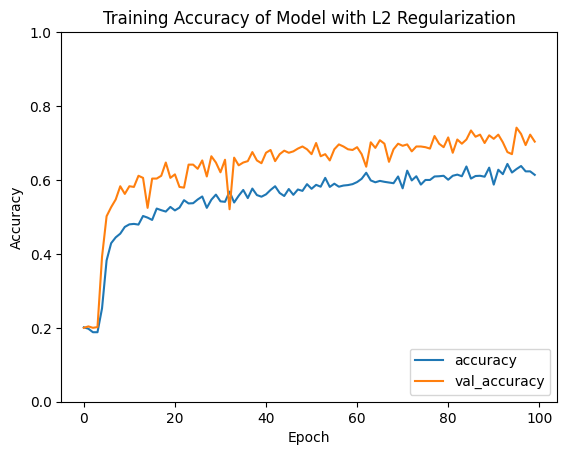

In [ ]:
plt.title('Training Accuracy of Model with L2 Regularization')
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

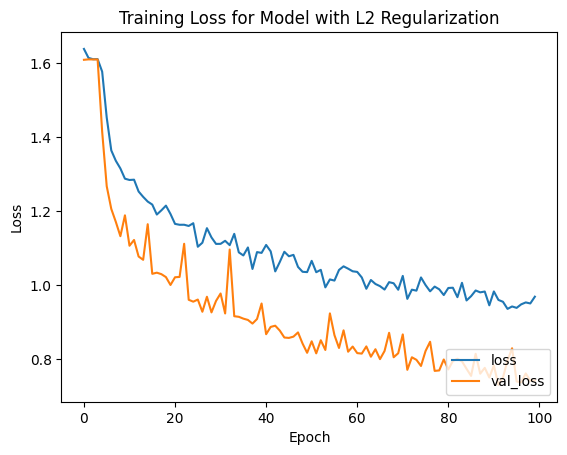

In [ ]:
plt.title('Training Loss for Model with L2 Regularization')
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

####Evaluate Model on Validation Set

In [ ]:
model_3.load_weights('model_3_best.hdf5')

In [ ]:
val_loss, val_acc = model_3.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 3s 6ms/step - loss: 0.7296 - accuracy: 0.7226
Accuracy: 72.26415276527405
Loss:0.7295795679092407


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7226415094339622
Precision: 0.7181631701631702
Recall: 0.7226415094339622
F1 Score: 0.7196237221684458


####Additional Training

In [ ]:
history3_2 = model_3.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
1588/1590 [============================>.] - ETA: 0s - loss: 0.9771 - accuracy: 0.6140
Epoch 1: val_loss did not improve from 0.72958
1590/1590 [==============================] - 21s 13ms/step - loss: 0.9766 - accuracy: 0.6145 - val_loss: 0.7582 - val_accuracy: 0.7132
Epoch 2/100
1590/1590 [==============================] - ETA: 0s - loss: 0.9545 - accuracy: 0.6189
Epoch 2: val_loss did not improve from 0.72958
1590/1590 [==============================] - 22s 14ms/step - loss: 0.9545 - accuracy: 0.6189 - val_loss: 0.7793 - val_accuracy: 0.7057
Epoch 3/100
1585/1590 [============================>.] - ETA: 0s - loss: 0.9457 - accuracy: 0.6372
Epoch 3: val_loss did not improve from 0.72958
1590/1590 [==============================] - 15s 9ms/step - loss: 0.9471 - accuracy: 0.6358 - val_loss: 0.7407 - val_accuracy: 0.7189
Epoch 4/100
1587/1590 [============================>.] - ETA: 0s - loss: 0.9683 - accuracy: 0.6125
Epoch 4: val_loss did not improve from 0.72958
1590/1590 [=

####Additional Training Learning Curves

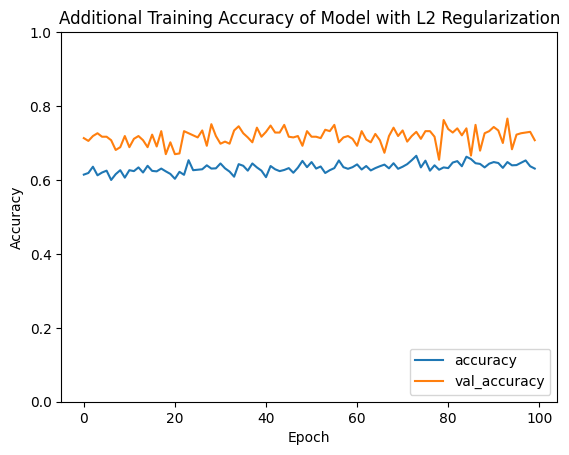

In [ ]:
plt.title('Additional Training Accuracy of Model with L2 Regularization')
plt.plot(history3_2.history['accuracy'], label='accuracy')
plt.plot(history3_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

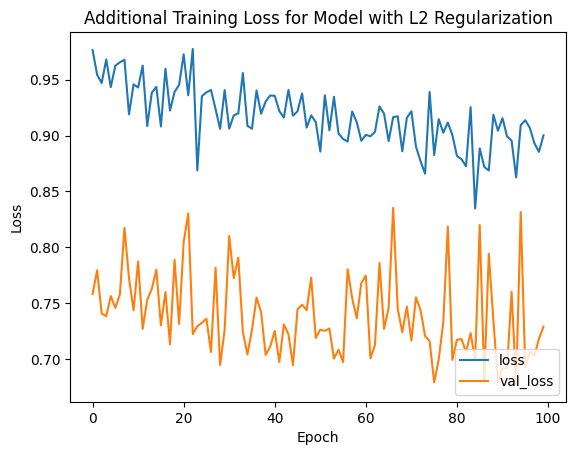

In [ ]:
plt.title('Additional Training Loss for Model with L2 Regularization')
plt.plot(history3_2.history['loss'], label='loss')
plt.plot(history3_2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_3.load_weights('model_3_best.hdf5')

####Evaluate Results of Model on Validation Set After Additional Training

In [ ]:
val_loss, val_acc = model_3.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 2s 4ms/step - loss: 0.6767 - accuracy: 0.7660
Accuracy: 76.60377621650696
Loss:0.6767489910125732


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7660377358490567
Precision: 0.7772888610303846
Recall: 0.7660377358490567
F1 Score: 0.7680919582803046


####Evaluate On Testing Set

In [ ]:
val_loss, val_acc = model_3.evaluate(testing_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

530/530 [==============================] - 2s 4ms/step - loss: 0.6787 - accuracy: 0.7679
Accuracy: 76.79245471954346
Loss:0.6786960363388062


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(testing_set)):
   x, y = testing_set.next()
   p = model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7679245283018868
Precision: 0.7723068610959564
Recall: 0.7679245283018868
F1 Score: 0.7682555762446869
